In [1]:
import pandas as pd
import numpy as np
from scipy import stats

Are the prose rhythms of Cicero and Caesar statistically different?
===
In this experiment we will test if the prose rhythms of Ciceo's speeches are statistically different from those of Caesar's histories. Since the variables are categorical we will perform a *chi square contingency text* on the samples using the `scipy` package.

First we need to load in and prepare the Cicero data. We need to drop unnecessary columns and rows.

In [2]:
cicero_df = pd.read_csv('../data/cicero_df_default_punc.csv')

In [3]:
cicero_df.set_index('title')
cicero_df.head()

,title,total_clausulae,total_excluded,abbrev_excluded,bracket_excluded,short_excluded,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),...,hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),total_artistic,misc_clausulae,percent_clausulae
0,academica,228,6,0,3,2,31.0,5.0,11.0,6.0,...,1.0,0.0,27.0,7.0,9.0,2.0,1.0,219.0,3.0,1.0
1,arati phaenomena,250,3,0,3,0,6.0,0.0,3.0,0.0,...,0.0,0.0,9.0,194.0,10.0,3.0,0.0,247.0,0.0,1.0
2,arati prognotica,9,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,0.0,1.0
3,brutus,1655,141,73,7,54,209.0,28.0,62.0,18.0,...,2.0,1.0,102.0,17.0,31.0,7.0,3.0,1487.0,27.0,1.0
4,carmina fragmenta,125,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,54.0,3.0,3.0,0.0,124.0,1.0,1.0


In [4]:
print(cicero_df['title'].to_string())

0                             academica
1                      arati phaenomena
2                      arati prognotica
3                                brutus
4                     carmina fragmenta
5               cato maior de senectute
6                  commentarii causarum
7                        de divinatione
8                           de domo sua
9                               de fato
10                           de finibus
11               de haruspicum responso
12                         de inventore
13           de iure civ in artem redig
14                      de lege agraria
15                    de lege agraria 1
16                    de lege agraria 2
17                    de lege agraria 3
18                           de legibus
19                     de natura deorum
20                          de officiis
21            de optimo genere oratorum
22                           de oratore
23               de partitione oratoria
24           de provinciis consularibus


In [5]:
cicero_speeches = cicero_df.drop(cicero_df.index[:8])
cicero_speeches = cicero_speeches.drop(cicero_df.index[9:11])
cicero_speeches = cicero_speeches.drop(cicero_df.index[12:14])
cicero_speeches = cicero_speeches.drop(cicero_df.index[15:24])
cicero_speeches = cicero_speeches.drop(cicero_df.index[25:54])
cicero_speeches = cicero_speeches.drop(cicero_df.index[112])
cicero_speeches = cicero_speeches.drop(cicero_df.index[56:60])
cicero_speeches = cicero_speeches.drop(cicero_df.index[64:77])
cicero_speeches = cicero_speeches.drop(cicero_df.index[78:93])
cicero_speeches = cicero_speeches.drop(cicero_df.index[118:])

In [6]:
cicero_speeches

,title,total_clausulae,total_excluded,abbrev_excluded,bracket_excluded,short_excluded,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),...,hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),total_artistic,misc_clausulae,percent_clausulae
8,de domo sua,809,65,13,8,44,137.0,16.0,51.0,11.0,...,2.0,1.0,52.0,13.0,14.0,5.0,1.0,727.0,17.0,1.0
11,de haruspicum responso,423,21,6,3,9,82.0,8.0,37.0,9.0,...,0.0,1.0,41.0,11.0,2.0,2.0,1.0,400.0,2.0,1.0
14,de lege agraria,850,61,18,13,30,167.0,12.0,35.0,17.0,...,3.0,0.0,71.0,16.0,18.0,5.0,0.0,768.0,21.0,1.0
24,de provinciis consularibus,265,11,6,0,5,48.0,3.0,31.0,4.0,...,0.0,0.0,17.0,4.0,3.0,1.0,0.0,252.0,2.0,1.0
54,in caecilium,334,17,8,0,9,66.0,7.0,15.0,10.0,...,0.0,1.0,23.0,8.0,6.0,4.0,0.0,311.0,6.0,1.0
55,in catilinam,676,22,10,2,10,151.0,11.0,43.0,12.0,...,1.0,1.0,34.0,11.0,15.0,3.0,2.0,643.0,11.0,1.0
60,in pisonem,663,44,8,3,9,130.0,20.0,23.0,10.0,...,0.0,3.0,56.0,13.0,13.0,4.0,0.0,607.0,12.0,1.0
61,in sallustinum,112,3,1,1,1,16.0,6.0,3.0,5.0,...,0.0,0.0,21.0,5.0,2.0,2.0,1.0,107.0,2.0,1.0
62,in vatinium,200,10,3,1,1,39.0,1.0,18.0,4.0,...,0.0,0.0,18.0,0.0,2.0,1.0,1.0,190.0,0.0,1.0
63,in verrem,6723,393,108,60,220,1085.0,165.0,303.0,131.0,...,7.0,23.0,629.0,144.0,186.0,93.0,19.0,6202.0,128.0,1.0


In [7]:
cicero_speeches = cicero_speeches.drop(columns=['total_clausulae', 'total_excluded', 'abbrev_excluded', 'bracket_excluded', 'short_excluded', 'total_artistic', 'percent_clausulae'])

In [8]:
cicero_speeches.head()

,title,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),...,double trochee 1 res (-uuux),hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae
8,de domo sua,137.0,16.0,51.0,11.0,61.0,35.0,11.0,4.0,1.0,...,2.0,42.0,2.0,1.0,52.0,13.0,14.0,5.0,1.0,17.0
11,de haruspicum responso,82.0,8.0,37.0,9.0,26.0,26.0,4.0,2.0,1.0,...,2.0,12.0,0.0,1.0,41.0,11.0,2.0,2.0,1.0,2.0
14,de lege agraria,167.0,12.0,35.0,17.0,58.0,60.0,7.0,3.0,2.0,...,4.0,52.0,3.0,0.0,71.0,16.0,18.0,5.0,0.0,21.0
24,de provinciis consularibus,48.0,3.0,31.0,4.0,21.0,19.0,3.0,2.0,0.0,...,5.0,4.0,0.0,0.0,17.0,4.0,3.0,1.0,0.0,2.0
54,in caecilium,66.0,7.0,15.0,10.0,29.0,30.0,3.0,1.0,0.0,...,1.0,16.0,0.0,1.0,23.0,8.0,6.0,4.0,0.0,6.0


In [9]:
cicero_titles = cicero_speeches['title']
cicero_speeches = cicero_speeches.drop('title', axis=1)

Now we will load the Caesar data frame and prepare that data similarly.

In [10]:
caesar_df = pd.read_csv('../data/caesar_df.csv')

In [11]:
caesar_df.head()

,title,total_clausulae,total_excluded,abbrev_excluded,bracket_excluded,short_excluded,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),...,hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),total_artistic,misc_clausulae,percent_clausulae
0,anticato,3,0,0,0,0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
1,bellum civile,1979,177,21,20,3,253.0,48.0,45.0,38.0,...,7.0,9.0,362.0,86.0,119.0,46.0,9.0,1787.0,15.0,1.0
2,carmina,4,0,0,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,1.0
3,de analogia,31,23,0,0,6,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,1.0,0.0,8.0,0.0,1.0
4,de bello gallico,2484,14,11,1,2,330.0,39.0,66.0,63.0,...,5.0,12.0,565.0,96.0,152.0,67.0,15.0,2450.0,20.0,1.0


In [12]:
caesar_df['title']

0                    anticato
1               bellum civile
2                     carmina
3                 de analogia
4            de bello gallico
5     de bello gallico book 1
6     de bello gallico book 2
7     de bello gallico book 3
8     de bello gallico book 4
9     de bello gallico book 5
10    de bello gallico book 6
11    de bello gallico book 7
12    de bello gallico book 8
13     epistulae ad ciceronem
14    epistulae ad familiares
15                  orationes
Name: title, dtype: object

In [13]:
caesar_history = caesar_df.drop(caesar_df.index[:1])
caesar_history = caesar_history.drop(caesar_df.index[2:4])
caesar_history = caesar_history.drop(caesar_df.index[5:])
caesar_history.head()

,title,total_clausulae,total_excluded,abbrev_excluded,bracket_excluded,short_excluded,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),...,hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),total_artistic,misc_clausulae,percent_clausulae
1,bellum civile,1979,177,21,20,3,253.0,48.0,45.0,38.0,...,7.0,9.0,362.0,86.0,119.0,46.0,9.0,1787.0,15.0,1.0
4,de bello gallico,2484,14,11,1,2,330.0,39.0,66.0,63.0,...,5.0,12.0,565.0,96.0,152.0,67.0,15.0,2450.0,20.0,1.0


In [14]:
caesar_history = caesar_history.drop(columns=['total_clausulae', 'total_excluded', 'abbrev_excluded', 'bracket_excluded', 'short_excluded', 'total_artistic', 'percent_clausulae'])

In [15]:
caesar_history.head()

,title,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),...,double trochee 1 res (-uuux),hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae
1,bellum civile,253.0,48.0,45.0,38.0,81.0,93.0,23.0,4.0,15.0,...,18.0,71.0,7.0,9.0,362.0,86.0,119.0,46.0,9.0,15.0
4,de bello gallico,330.0,39.0,66.0,63.0,89.0,128.0,11.0,4.0,13.0,...,36.0,81.0,5.0,12.0,565.0,96.0,152.0,67.0,15.0,20.0


In [16]:
caesar_history = caesar_history.drop('title', axis=1)
caesar_history.head()

,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),double/molossus-cretic molossus not chor 1 res (uu---ux),...,double trochee 1 res (-uuux),hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae
1,253.0,48.0,45.0,38.0,81.0,93.0,23.0,4.0,15.0,16.0,...,18.0,71.0,7.0,9.0,362.0,86.0,119.0,46.0,9.0,15.0
4,330.0,39.0,66.0,63.0,89.0,128.0,11.0,4.0,13.0,31.0,...,36.0,81.0,5.0,12.0,565.0,96.0,152.0,67.0,15.0,20.0


Now we need to create a new matrix with two rows (one Cicero and one Caesar) and the same columns. The rows are the sums of the columns for the authors.

In [17]:
cicero_sum = cicero_speeches.sum(axis=0)

In [18]:
caesar_sum = caesar_history.sum(axis=0)

In [19]:
df = pd.concat([cicero_sum, caesar_sum], axis=1)

In [20]:
df = df.T # transpose the matrix

In [21]:
df.head()

,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),double/molossus-cretic molossus not chor 1 res (uu---ux),...,double trochee 1 res (-uuux),hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae
0,4472.0,563.0,1367.0,460.0,2182.0,1647.0,277.0,111.0,65.0,409.0,...,144.0,1145.0,30.0,70.0,2323.0,468.0,637.0,244.0,64.0,471.0
1,583.0,87.0,111.0,101.0,170.0,221.0,34.0,8.0,28.0,47.0,...,54.0,152.0,12.0,21.0,927.0,182.0,271.0,113.0,24.0,35.0


Now we can compute our chi square statistics. Our null hypothesis $H_0$ is that there is no statistically significant difference between the rhythms of Cicero and Caesar. The alternative hypothesis $H_1$ is that there is a statistically significant difference between the rhythms of Cicero and Caesar. If our p < 0.05, then we reject $H_0$.

In [22]:
chi_metric, p, dof, contingency_table = stats.chi2_contingency(df)

In [23]:
p

3.6305480954579866e-240

p < 0.05, so we reject the null hypothesis. There is a statistically significant difference between the rhythms of Cicero and Caesar.

We can also check our chi metric. We have 25 degrees of freedom in this problem, so if our chi square value is greater than 37.652 (see https://www.medcalc.org/manual/chi-square-table.php) then we must reject the null hypothesis.

In [24]:
chi_metric

1212.6012639010469

In [25]:
dof

25

Can we reliably test whether the speeches of Cicero are statistically similar to each other?
===

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
cicero_speeches.head()

,cretic-trochee (-u--x),cretic-trochee 1 res (uuu--x),cretic-trochee 1 res (-uuu-x),cretic-trochee 1 res (-u-uux),double/molossus-cretic pure double-cretic (-u--ux),double/molossus-cretic pure molossus-cretic (----ux),double/molossus-cretic 1 res (uuu--ux),double/molossus-cretic 1 res (-uuu-ux),double/molossus-cretic 1 res (-u-uuux),double/molossus-cretic molossus not chor 1 res (uu---ux),...,double trochee 1 res (-uuux),hypodochmiac (-u-ux),hypodochmiac 1 res (uuu-ux),hypodochmiac 1 res (-uuuux),spondaic (---x),heroic (-uu-x),first paeon (-uux),choriamb trochee (-uu--x),short sequence (uuuuux),misc_clausulae
8,137.0,16.0,51.0,11.0,61.0,35.0,11.0,4.0,1.0,13.0,...,2.0,42.0,2.0,1.0,52.0,13.0,14.0,5.0,1.0,17.0
11,82.0,8.0,37.0,9.0,26.0,26.0,4.0,2.0,1.0,4.0,...,2.0,12.0,0.0,1.0,41.0,11.0,2.0,2.0,1.0,2.0
14,167.0,12.0,35.0,17.0,58.0,60.0,7.0,3.0,2.0,12.0,...,4.0,52.0,3.0,0.0,71.0,16.0,18.0,5.0,0.0,21.0
24,48.0,3.0,31.0,4.0,21.0,19.0,3.0,2.0,0.0,4.0,...,5.0,4.0,0.0,0.0,17.0,4.0,3.0,1.0,0.0,2.0
54,66.0,7.0,15.0,10.0,29.0,30.0,3.0,1.0,0.0,8.0,...,1.0,16.0,0.0,1.0,23.0,8.0,6.0,4.0,0.0,6.0


In [28]:
scaled_cicero_speeches = StandardScaler().fit_transform(cicero_speeches)

In [29]:
scaled_cicero_speeches[:5]

array([[ 0.04588298, -0.00287496,  0.20415725, -0.09464297, -0.01142274,
        -0.14078524,  0.22828543,  0.18567631, -0.20942695,  0.0591162 ,
        -0.16266747, -0.01536826, -0.29549891, -0.09965946,  0.20732349,
         0.32367182, -0.25366277,  0.14549727,  0.76416072, -0.23992872,
        -0.12701333, -0.01521352, -0.12324705, -0.12319386, -0.23667359,
         0.15361601],
       [-0.22756819, -0.27120471, -0.03516584, -0.18297641, -0.30914321,
        -0.24587375, -0.28958429, -0.26250788, -0.20942695, -0.34570125,
        -0.16266747, -0.14984049, -0.24480057, -0.42666707, -0.24667758,
         0.15829206, -0.25366277, -0.32457084, -0.57312054, -0.23992872,
        -0.2242303 , -0.09713244, -0.47538149, -0.31066278, -0.23667359,
        -0.49677435],
       [ 0.19503816, -0.13703983, -0.06935486,  0.17035734, -0.03694164,
         0.15112729, -0.06764013, -0.03841579,  0.03490449,  0.01413648,
         0.1988158 ,  0.25357622, -0.09270554, -0.04515819,  0.08035709,
       

In [30]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_cicero_speeches)

In [31]:
cicero_speeches_pca_df = pd.DataFrame(data=components, columns=['Component 1', 'Component 2'])

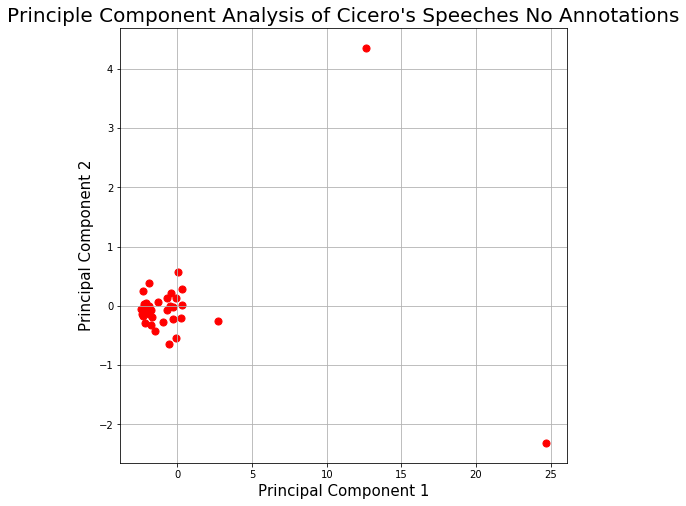

In [39]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principle Component Analysis of Cicero\'s Speeches No Annotations', fontsize = 20)


ax.scatter(x=cicero_speeches_pca_df['Component 1'], y=cicero_speeches_pca_df['Component 2']
           , c = 'r'
           , s = 50)

ax.grid()
plt.show()

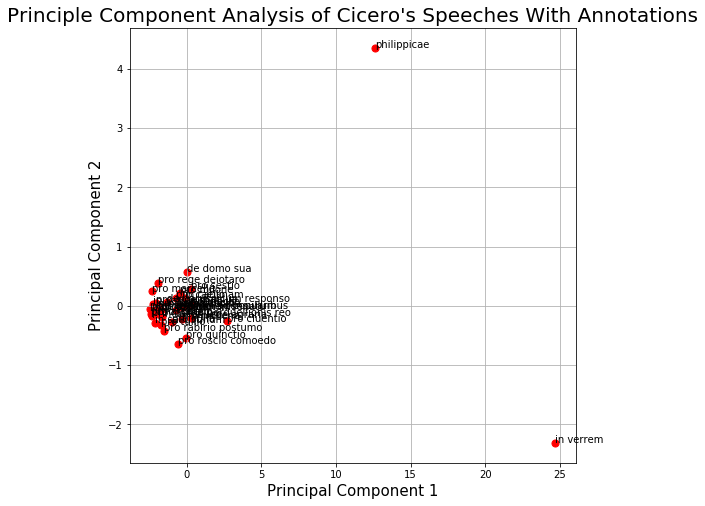

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principle Component Analysis of Cicero\'s Speeches With Annotations', fontsize = 20)


ax.scatter(x=cicero_speeches_pca_df['Component 1'], y=cicero_speeches_pca_df['Component 2']
           , c = 'r'
           , s = 50)

for i, title in enumerate(cicero_titles):
    ax.annotate(title, (cicero_speeches_pca_df['Component 1'][i], cicero_speeches_pca_df['Component 2'][i]))

ax.grid()
plt.show()